# Importar librerías básicas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importar librearías (o métodos) especializadas(os) a utilizar

In [2]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored, concordance_index_ipcw, cumulative_dynamic_auc

from sklearn.model_selection import train_test_split

# Cargar los datos a utilizar

Se van a utlizar datos de un estudio de cáncer de seno y de reincidencia realizado en 1994

Para el ejemplo, sólo se va a utlizar como variable independiente, el año en que fue detectado el cáncer

In [3]:
independent_survival_variables_example = pd.read_csv( 'independent_survival_variables_example.csv' , index_col=0 )
y_survival_variables = pd.read_csv( 'y_survival_variables.csv' , index_col=0 )

# Explorar los datos cargados

In [4]:
y_survival_variables

,death,dtime
0,0.0,1798.999948
1,0.0,2828.000021
2,0.0,6011.999804
3,0.0,2623.999895
4,0.0,4914.999997
...,...,...
2977,1.0,1989.999951
2978,1.0,45.000001
2979,1.0,581.999975
2980,1.0,4972.000179


In [5]:
independent_survival_variables_example

,year
0,1992.0
1,1984.0
2,1983.0
3,1985.0
4,1983.0
...,...
2977,1990.0
2978,1987.0
2979,1985.0
2980,1983.0


# Preparación de la data necesaria para Survival Models

In [6]:
# Transformar datos de censura a datos categóricos
y_survival_variables['death'] = np.where(y_survival_variables['death']==1,False,True)

#Poner los datos de test en el formato correcto de la librería
y_survival_variables = y_survival_variables.to_records(index=False)

In [7]:
y_survival_variables

rec.array([( True, 1798.99994755), ( True, 2828.00002146),
           ( True, 6011.99980354), ..., (False,  581.99997461),
           (False, 4972.00017929), (False,  378.99998945)],
          dtype=[('death', '?'), ('dtime', '<f8')])

# Dividir los datos en train y test

In [8]:
# Dividir datos en train y test
train, test, y_train, y_test = train_test_split( independent_survival_variables_example ,
                                                y_survival_variables , test_size=0.33 ,random_state = 123 )

# Entrenamiento del modelo

In [9]:
# Inicialización de la clase
rf_surv = RandomSurvivalForest(n_estimators=100,
                           max_depth = None,
                           min_samples_split = 0.01,
                           min_samples_leaf = 0.01,
                           max_features = 1,
                           n_jobs=20,
                           random_state=123, max_samples=0.9,bootstrap = True)

# Fit del modelo
rf_surv.fit(train,y_train)

# Predicciones sobre train y test
y_train_pred = rf_surv.predict(train)
y_test_pred = rf_surv.predict(test)

In [12]:
y_train

rec.array([( True, 2572.00009966), ( True, 3401.99996948),
           ( True, 1773.00004983), ..., (False,  805.00002623),
           ( True, 2196.99989128), ( True, 3381.00011015)],
          dtype=[('death', '?'), ('dtime', '<f8')])

In [10]:
print('Performance del modelo en train : ',rf_surv.score(train, y_train))
print('Performance del modelo en test : ',rf_surv.score(test, y_test))

Performance del modelo en train :  0.8255775420163957
Performance del modelo en test :  0.8119856781136255


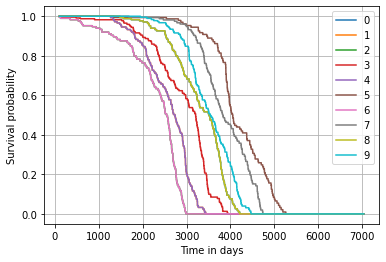

In [11]:
surv = rf_surv.predict_survival_function(test.iloc[0:10], return_array=True)

for i, s in enumerate(surv):
    plt.step(rf_surv.event_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)